In [138]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


awards_players = pd.read_csv("data/awards_players.csv")
coaches = pd.read_csv("data/coaches.csv")
players_teams = pd.read_csv("data/players_teams.csv")
players = pd.read_csv("data/players.csv")
series_post = pd.read_csv("data/series_post.csv")
teams_post = pd.read_csv("data/teams_post.csv")
teams = pd.read_csv("data/teams.csv")

tables = [awards_players,coaches,players_teams,players,series_post,teams_post,teams]

In [140]:
training_data = teams[teams['year'] < 10]
testing_data = teams[teams['year'] == 10]

X_train, Y_train = training_data[["homeW", "homeL", "awayL", "awayW"]], training_data["playoff"]
X_test, Y_test = testing_data[["homeW", "homeL", "awayL", "awayW"]], testing_data["playoff"]

0.6923076923076923


<Axes: >

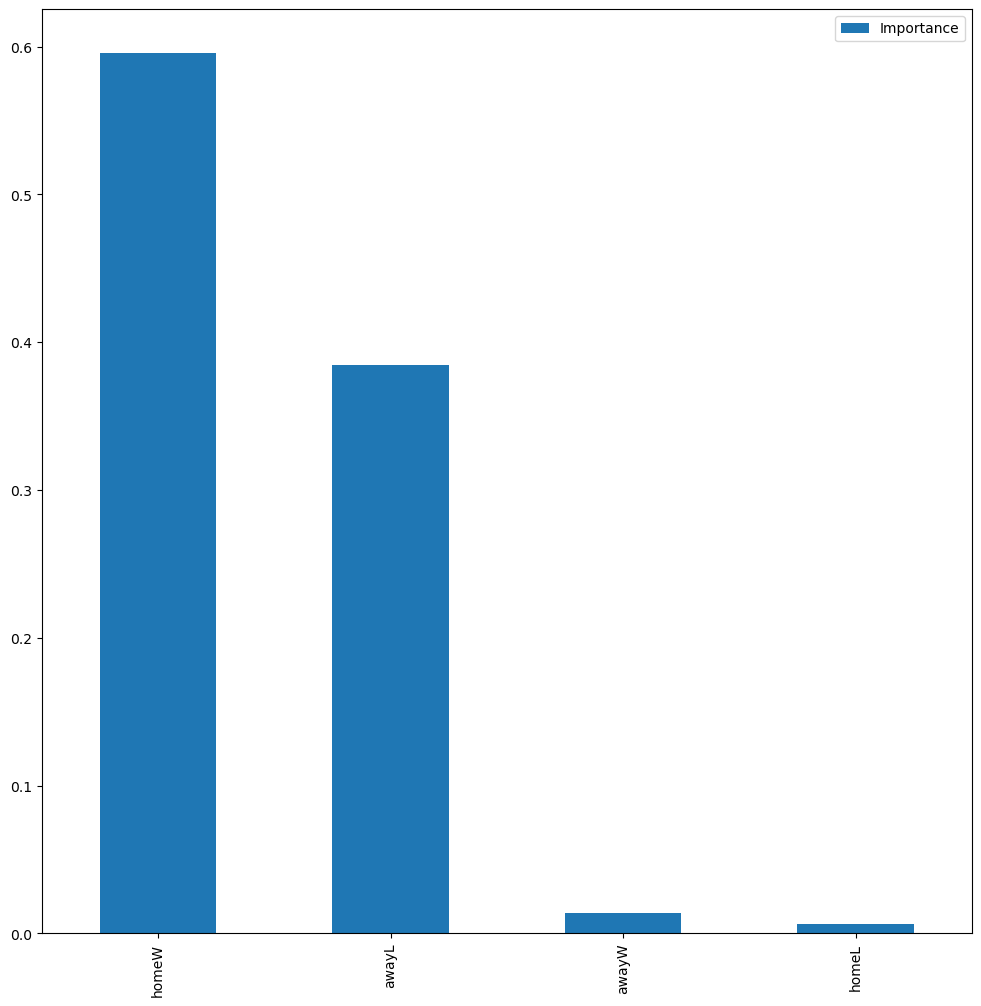

In [141]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
print(decision_tree.score(X_test, Y_test))

feat_importances = pd.DataFrame(decision_tree.feature_importances_, index=["homeW", "homeL", "awayL", "awayW"], columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(12, 12))